# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

# Разделение на районы

In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
geo_data = pd.read_excel('geo.xlsx')
comments_data = pd.read_excel('geo_comment.xlsx')

In [7]:
scaler = StandardScaler()

In [13]:
geo_data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [41]:
n = 10

In [42]:
method = KMeans(n)

In [43]:
districts = method.fit_predict(geo_data[['x', 'y']])

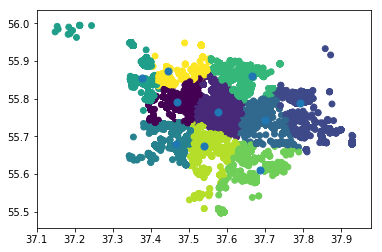

In [44]:
plt.scatter(geo_data['x'], geo_data['y'], c=districts, s=35)
centers = method.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [56]:
OK_geo = geo_data[geo_data['comment_class'] == 1]
NOK_geo = geo_data[geo_data['comment_class'] == -1]

In [57]:
n = 5

In [58]:
method = KMeans(n)

In [59]:
OK_districts = method.fit_predict(OK_geo[['x', 'y']])

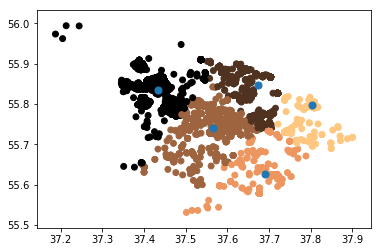

In [60]:
plt.scatter(OK_geo['x'], OK_geo['y'], c=OK_districts, cmap='copper', s=35)
centers = method.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [62]:
NOK_districts = method.fit_predict(NOK_geo[['x', 'y']])

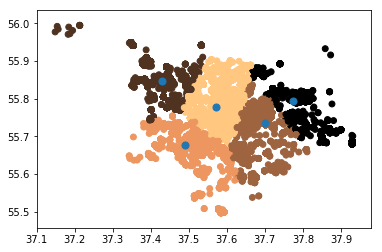

In [63]:
plt.scatter(NOK_geo['x'], NOK_geo['y'], c=NOK_districts, cmap='copper', s=35)
centers = method.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

## Оптимальное количество кластеров

In [66]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
geo=geo_data[['x', 'y']]

In [70]:
X_scaled = scaler.fit_transform(geo)

In [71]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

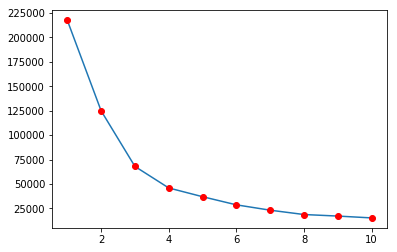

In [72]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [73]:
diff = np.diff(k_inertia)

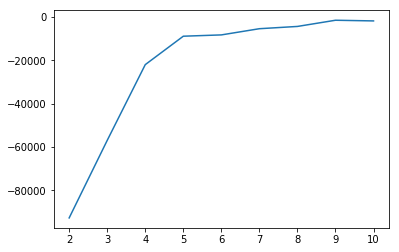

In [74]:
plt.plot(ks[1:], diff)

In [75]:
diff_r = diff[1:] / diff[:-1]

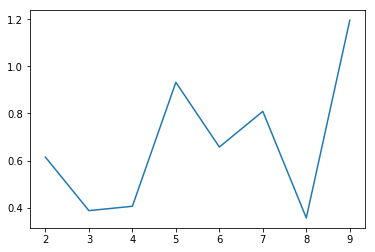

In [76]:
plt.plot(ks[1:-1], diff_r)

In [77]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

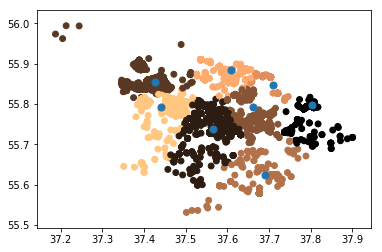

In [82]:
n = k_opt
method = KMeans(n)
OK_districts = method.fit_predict(OK_geo[['x', 'y']])
plt.scatter(OK_geo['x'], OK_geo['y'], c=OK_districts, cmap='copper', s=35)
centers = method.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)